### Phase 1 Small Grid Test

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

# --- 1. Data Loading ---
def load_results(filepath):
    """
    Reads the jsonl results file and flattens the dictionary structure
    for easier pandas manipulation.
    """
    data = []
    with open(filepath, 'r') as f:
        for line in f:
            try:
                # Load line as dict
                entry = json.loads(line)
                
                # Flatten specific nested metrics if necessary
                # Example: If 'metrics' is a nested dict, unpack it here
                # For now, assuming flat structure based on your description
                data.append(entry)
            except json.JSONDecodeError:
                print(f"Skipping invalid line: {line[:50]}...")
                continue
    
    return pd.DataFrame(data)

# Use '../' to go up one level from 'notebooks/' to the project root
df = load_results('../results/phase1_18677015/phase1_results.jsonl')

# Preview to ensure columns match expectations
print(f"Loaded {len(df)} runs.")
print(df.columns.tolist())

Loaded 600 runs.
['prey_birth', 'prey_death', 'predator_birth', 'predator_death', 'grid_size', 'with_evolution', 'seed', 'prey_mean', 'prey_std', 'pred_mean', 'pred_std', 'prey_survived', 'pred_survived', 'prey_n_clusters', 'pred_n_clusters', 'prey_cluster_sizes', 'pred_cluster_sizes', 'prey_largest_fraction', 'pred_largest_fraction', 'pcf_distances', 'pcf_prey_prey', 'pcf_pred_pred', 'pcf_prey_pred', 'segregation_index', 'prey_clustering_index', 'pred_clustering_index']


In [14]:
df.head()

,prey_birth,prey_death,predator_birth,predator_death,grid_size,with_evolution,seed,prey_mean,prey_std,pred_mean,...,pred_cluster_sizes,prey_largest_fraction,pred_largest_fraction,pcf_distances,pcf_prey_prey,pcf_pred_pred,pcf_prey_pred,segregation_index,prey_clustering_index,pred_clustering_index
0,0.2,0.0,0.8,0.05,1000,False,1837646025,38948.909,2328.936490,50074.603,...,"[499, 450, 342, 341, 269, 250, 218, 194, 168, ...",0.028134,0.009839,"[0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, ...","[0.0, 12.711589873862426, 11.457978520813151, ...","[0.0, 5.7459826896482245, 5.37819029873667, 3....","[0.0, 1.432663956018421, 2.1549870943796017, 1...",1.195884,8.056523,3.708058
1,0.2,0.0,0.8,0.05,1000,False,3181451485,39281.003,2632.921350,49477.523,...,"[450, 418, 368, 328, 280, 246, 224, 215, 209, ...",0.038943,0.008585,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.2,0.0,0.8,0.05,1000,False,68848981,38333.452,2254.101597,50065.300,...,"[282, 273, 192, 177, 156, 142, 136, 135, 130, ...",0.018204,0.005546,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.2,0.0,0.8,0.05,1000,False,3428376121,37976.355,3292.214752,49520.485,...,"[356, 279, 254, 244, 205, 199, 196, 179, 176, ...",0.020420,0.007254,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.2,0.0,0.8,0.05,1000,False,1078973253,38372.469,2974.433928,49231.087,...,"[351, 321, 296, 256, 223, 202, 183, 163, 152, ...",0.020801,0.007107,"[0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, ...","[0.0, 12.902727038858414, 11.157469206563588, ...","[0.0, 5.782060323131155, 5.310622102968478, 3....","[0.0, 1.510324525889525, 2.291676328915395, 2....",1.267334,8.020065,3.697561


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   prey_birth             600 non-null    float64
 1   prey_death             600 non-null    float64
 2   predator_birth         600 non-null    float64
 3   predator_death         600 non-null    float64
 4   grid_size              600 non-null    int64  
 5   with_evolution         600 non-null    bool   
 6   seed                   600 non-null    int64  
 7   prey_mean              600 non-null    float64
 8   prey_std               600 non-null    float64
 9   pred_mean              600 non-null    float64
 10  pred_std               600 non-null    float64
 11  prey_survived          600 non-null    bool   
 12  pred_survived          600 non-null    bool   
 13  prey_n_clusters        600 non-null    int64  
 14  pred_n_clusters        600 non-null    int64  
 15  prey_c

In [16]:
df.describe()

,prey_birth,prey_death,predator_birth,predator_death,grid_size,seed,prey_mean,prey_std,pred_mean,pred_std,prey_n_clusters,pred_n_clusters,prey_largest_fraction,pred_largest_fraction,segregation_index,prey_clustering_index,pred_clustering_index
count,600.0,600.000000,600.0,600.00,600.0,6.000000e+02,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,360.000000,300.000000,60.000000,60.000000,60.000000
mean,0.2,0.100000,0.8,0.05,1000.0,2.118074e+09,76152.679988,3321.885191,28005.979360,809.198207,6181.465000,7436.708333,0.013476,0.003694,0.597010,3.481125,2.757676
std,0.0,0.060748,0.0,0.00,0.0,1.247894e+09,87739.447546,6264.004868,29293.352246,968.175089,6894.040689,7660.522776,0.012431,0.002898,0.278164,1.960594,0.489670
min,0.2,0.000000,0.8,0.05,1000.0,4.036836e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000844,0.001002,0.223412,1.036882,2.279789
25%,0.2,0.050000,0.8,0.05,1000.0,1.077761e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.007551,0.001631,0.370910,1.840380,2.413113
50%,0.2,0.100000,0.8,0.05,1000.0,2.087804e+09,53256.791500,1829.158274,11843.535000,347.834612,5055.500000,4555.000000,0.010214,0.002528,0.554293,3.123926,2.604473
75%,0.2,0.150000,0.8,0.05,1000.0,3.217958e+09,119985.394250,2595.961977,59563.718250,1425.595261,9068.250000,15314.000000,0.016840,0.004951,0.782579,4.850946,2.823626
max,0.2,0.200000,0.8,0.05,1000.0,4.284761e+09,302256.626000,28606.084020,67359.289000,4186.972857,23878.000000,18401.000000,0.104429,0.017922,1.267334,8.056523,4.161660


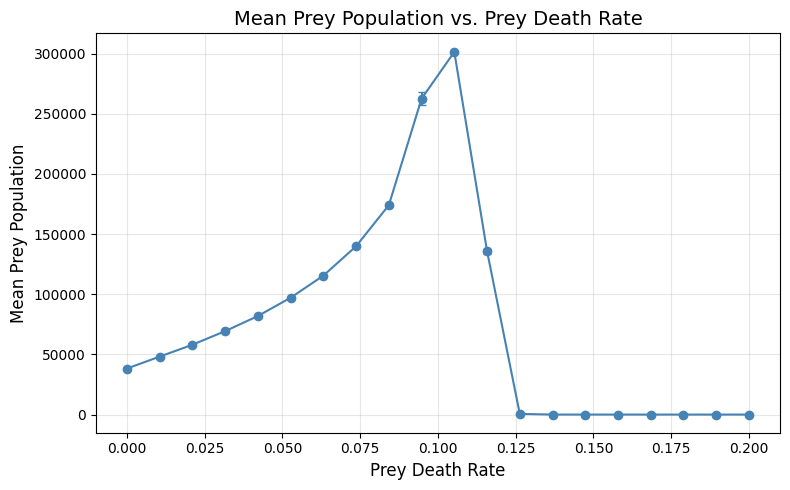

In [17]:
# Group by prey_death, compute mean and std across replicates
grouped = df.groupby('prey_death')['prey_mean'].agg(['mean', 'std']).reset_index()

# Plot
fig, ax = plt.subplots(figsize=(8, 5))

ax.errorbar(grouped['prey_death'], grouped['mean'], yerr=grouped['std'], 
            fmt='o-', capsize=3, color='steelblue', markersize=6)

ax.set_xlabel('Prey Death Rate', fontsize=12)
ax.set_ylabel('Mean Prey Population', fontsize=12)
ax.set_title('Mean Prey Population vs. Prey Death Rate', fontsize=14)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('prey_pop_vs_death_rate.png', dpi=150)
plt.show()

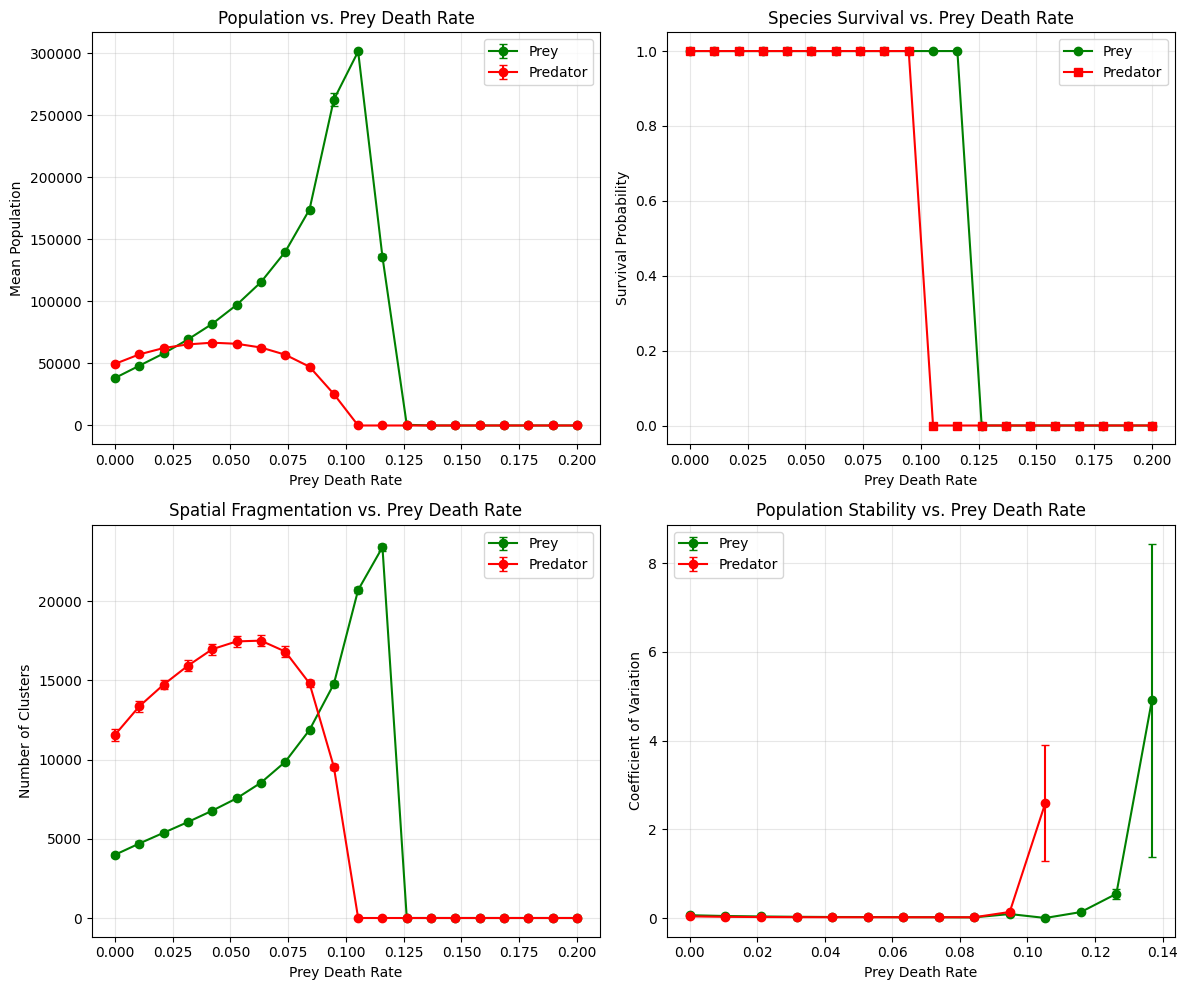

In [18]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# 1. Prey AND Predator population vs death rate
ax = axes[0, 0]
for pop, label, color in [('prey_mean', 'Prey', 'green'), ('pred_mean', 'Predator', 'red')]:
    agg = df.groupby('prey_death')[pop].agg(['mean', 'std']).reset_index()
    ax.errorbar(agg['prey_death'], agg['mean'], yerr=agg['std'], 
                fmt='o-', capsize=3, label=label, color=color)
ax.set_xlabel('Prey Death Rate')
ax.set_ylabel('Mean Population')
ax.set_title('Population vs. Prey Death Rate')
ax.legend()
ax.grid(True, alpha=0.3)

# 2. Survival probability
ax = axes[0, 1]
surv = df.groupby('prey_death').agg({
    'prey_survived': 'mean',
    'pred_survived': 'mean'
}).reset_index()
ax.plot(surv['prey_death'], surv['prey_survived'], 'o-', color='green', label='Prey')
ax.plot(surv['prey_death'], surv['pred_survived'], 's-', color='red', label='Predator')
ax.set_xlabel('Prey Death Rate')
ax.set_ylabel('Survival Probability')
ax.set_title('Species Survival vs. Prey Death Rate')
ax.legend()
ax.grid(True, alpha=0.3)

# 3. Number of clusters (spatial fragmentation)
ax = axes[1, 0]
for col, label, color in [('prey_n_clusters', 'Prey', 'green'), ('pred_n_clusters', 'Predator', 'red')]:
    agg = df.groupby('prey_death')[col].agg(['mean', 'std']).reset_index()
    ax.errorbar(agg['prey_death'], agg['mean'], yerr=agg['std'], 
                fmt='o-', capsize=3, label=label, color=color)
ax.set_xlabel('Prey Death Rate')
ax.set_ylabel('Number of Clusters')
ax.set_title('Spatial Fragmentation vs. Prey Death Rate')
ax.legend()
ax.grid(True, alpha=0.3)

# 4. Coefficient of variation (population stability)
ax = axes[1, 1]
df['prey_cv'] = df['prey_std'] / df['prey_mean'].replace(0, np.nan)
df['pred_cv'] = df['pred_std'] / df['pred_mean'].replace(0, np.nan)
for col, label, color in [('prey_cv', 'Prey', 'green'), ('pred_cv', 'Predator', 'red')]:
    agg = df.groupby('prey_death')[col].agg(['mean', 'std']).reset_index()
    ax.errorbar(agg['prey_death'], agg['mean'], yerr=agg['std'], 
                fmt='o-', capsize=3, label=label, color=color)
ax.set_xlabel('Prey Death Rate')
ax.set_ylabel('Coefficient of Variation')
ax.set_title('Population Stability vs. Prey Death Rate')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('phase1_summary.png', dpi=150)
plt.show()

Prey: Power-law exponent α = 2.39
Predator: Power-law exponent α = 3.06


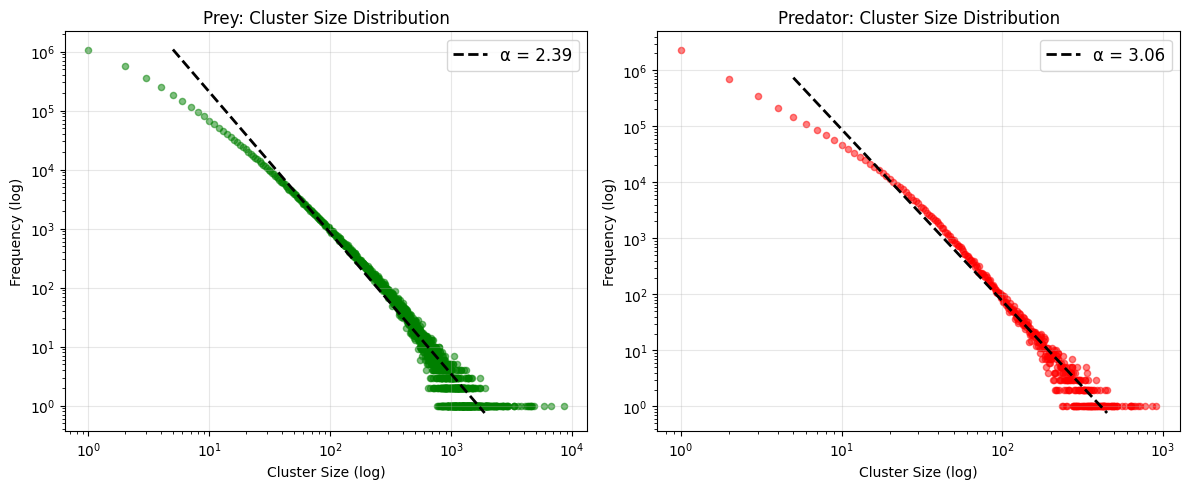

In [19]:
import ast

# Parse cluster sizes
def parse_list(x):
    if isinstance(x, list):
        return x
    if pd.isna(x) or x == '[]':
        return []
    try:
        return ast.literal_eval(x)
    except:
        return []

df['prey_clusters_parsed'] = df['prey_cluster_sizes'].apply(parse_list)
df['pred_clusters_parsed'] = df['pred_cluster_sizes'].apply(parse_list)

# ============================================================================
# Power-Law Cluster Size Distribution
# ============================================================================
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for ax, (col, label, color) in zip(axes, [('prey_clusters_parsed', 'Prey', 'green'), 
                                           ('pred_clusters_parsed', 'Predator', 'red')]):
    # Aggregate all cluster sizes
    all_sizes = np.array([s for sizes in df[col] for s in sizes if s > 0])
    
    if len(all_sizes) > 0:
        # Log-log histogram
        sizes, counts = np.unique(all_sizes, return_counts=True)
        ax.scatter(sizes, counts, alpha=0.5, color=color, s=20)
        ax.set_xscale('log')
        ax.set_yscale('log')
        ax.set_xlabel('Cluster Size (log)')
        ax.set_ylabel('Frequency (log)')
        ax.set_title(f'{label}: Cluster Size Distribution')
        ax.grid(True, alpha=0.3)
        
        # Power-law fit via linear regression in log-log space
        # P(s) ∝ s^(-α)  =>  log P(s) = -α log(s) + const
        mask = (sizes >= 5) & (counts >= 2)
        if mask.sum() > 5:
            log_s = np.log10(sizes[mask])
            log_c = np.log10(counts[mask])
            slope, intercept = np.polyfit(log_s, log_c, 1)
            
            fit_x = np.logspace(np.log10(sizes[mask].min()), np.log10(sizes[mask].max()), 50)
            fit_y = 10**intercept * fit_x**slope
            ax.plot(fit_x, fit_y, 'k--', lw=2, label=f'α = {-slope:.2f}')
            ax.legend(fontsize=12)
            
            print(f"{label}: Power-law exponent α = {-slope:.2f}")

plt.tight_layout()
plt.savefig('cluster_powerlaw.png', dpi=150)
plt.show()